In [1]:
import pandas as pd
import numpy as np
import torch
import math
from functools import partial
import matplotlib.pyplot as plt

In [2]:
import fastbook
fastbook.setup_book()

#hide
from fastbook import *

/home/benjamin/anaconda3/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In last week's exercices and in this week's lesson, you've discovered gradient descent at work. The fact that it could be that simple (just make a bunch of calculations, and let the model learn) usually puzzles the beginners. I think it helps to understand the intuition between derivatives and gradients.

This notebook will give you an understanding of derivatives using code, maths, and images. I hope you like my approach to explaining it all :)

# WHY do we calculate those gradient ? How does this work ? 

Gradient is _the multivariable calculus_ name of a derivative. "Great", I hear you reply. "you replaced a fancy name with another". I'm speaking Javanese here, right ? Bear with me. To understand gradients, we need to understand derivatives, and to understand derivatives we need to understand functions.

So let's start with functions : 

## Function: cow

Think of a function as a industrial black box, a machine. You put something in it, and it gives you something else.

However, to give you a more visual example, let's use the example of a cow. You give it something (grass), and it gives you back something else (milk):

<img src="illustrations/cow.png" />

In [4]:
def cow(grass):
  milk = grass * 2
  return milk

# Let's give our function 100kg of grass and see what it gives us back:

print('you got ' + str(cow(100)) + ' liters of milk')

you got 200 liters of milk


We say that the number of liters of milk we get is <b><i>a function</i> of the grass</b>; the more grass we feed, the more milk we get ! 



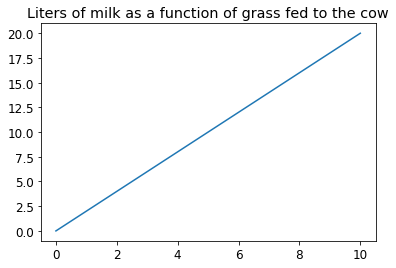

In [5]:
plot_function(cow, title="Liters of milk as a function of grass fed to the cow", min=0, max= 10)

## The derivative: what happens if we put more into our function ? 

A lot of people present the derivative as "the slope" of the tangent to a  function. While this is true, I think this presentation is not sufficient.

What would happen if we gave more grass to the cow ? Well, if you read the definition of the function attentively, you saw every time we give some more grass to the cow, we get an additional two times that quantity of milk


Note that it doesn't matter if we already fed our cow 200kg of grass. If we give it more grass, it will output more milk (it's not a very realistic cow, but we'll come back to that later)

In order to know how much the output (milk) of our function is gonna change if we change the input (grass) by a tiny bit, scientists use what's called a <b> derivative </b>. The mathematical formula is as follows :

<span style='font-size: 40px'>
\begin{array}{c}
t_{x_{0}}(h)=\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}
\end{array}
</span>

Don't bother too much with it, and certainly don't learn it by heart. Just let's see what happens if we replace the letters in this equation by numbers.
Our function is called "cow", so replace f() by cow(); let's say h0 is 3, and h is one : 

In [6]:
round((cow(4) - cow(3)) / 1 )

2

In [7]:
# This time h0 is also three, but h is 0.0001
round((cow(3 + 0.0001) - cow(3)) / 0.0001)

2

In [8]:
# This time h0 is also three, but h is 0.000000001
round((cow(3 + 0.000000001) - cow(3)) / 0.000000001)

2

That's the true definition of a derivative: <b> if I change what I put into my function by a very very small amount (0.00000...01), how is my output gonna change ? </b> 

As you can see, the derivative of 2*x is just 2. But our cow wasn't very realistic... At some point your cow will stop producing milk even if you give it more grass. It will just stop eating and stop producing; The production of a cow might look more like something like this: 

### A more realistic cow

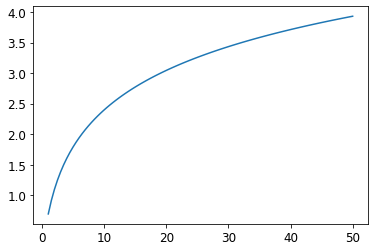

In [10]:
def realistic_cow(grass):
  milk = np.log(grass + 1)
  return milk


plot_function(realistic_cow, min=1, max=50)

At first, more grass means a lot more milk. But when the cow has already outputted 30 liters of milk, you have to give it WAYYY more grass to have some extra milk...

Since this time, how much more milk depends on where you are on the curve, you won't always get the same number as your derivative : 

In [15]:
(realistic_cow(4) - realistic_cow(3)) / 1

0.2231435513142097

In [16]:
(realistic_cow(3 + 0.0001) - realistic_cow(3)) / 0.0001

0.2499968750524495

In [17]:
(realistic_cow(3 + 0.000000001) - realistic_cow(3)) / 0.000000001

0.25000002068509275

So with a function that is not a straight linear relationship, the derivative won't be just a constant, it's going to be itself a function of your input. <b> The more you already gave grass to the cow, the less your new tiny input is going to have an effect on the output </b> : 

In [19]:
(realistic_cow(200 + 0.000000001) - realistic_cow(200)) / 0.000000001

0.004974687328740401

This time, your derivative is not 2, but 1/x (that's the formula for the derivative of ln(x) ). 


[ Not important at all technicality:  Well, in fact, in order to make sure our cow would not output a negative number of milk (which doesn't make sense), I said its output was going to be np.log(x + 1);

The derivative of ln(x) is 1/x, but the derivative of ln(x + 1) is 1 / (x + 1). Just saying, to be mathematically correct. But don't bother with this. ]

## The derivative as "the slope" of the tangent to  a function

Since this way is the way derivatives are usually introduced, I'll go over it quickly. Feel free to watch <a href="https://www.youtube.com/watch?v=ANyVpMS3HL4">this video</a> for a more thorough presentation.

In [20]:
# (Note: the tangent to a function and the concept of a derivative are so closely related 
# that when I looked for a quick function to plot a tangent in python, 
# I found one which uses the derivative to do that !)
# found here: https://math-physics-problems.wikia.org/wiki/Graphing_Tangent_Lines_with_Python
def deriv(f,x):
    h = 0.000000001                 #step-size 
    return (f(x+h) - f(x))/h        #definition of derivative

In [21]:
 def tangent_line(f,x_0,a,b, ax):
    x = np.linspace(a,b,200)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 
   
  #plotting
    ax.plot(x,y,'r-')
    ax.plot(x,y_tan,'b-')
    ax.axis([-0.2,b,a,b])   

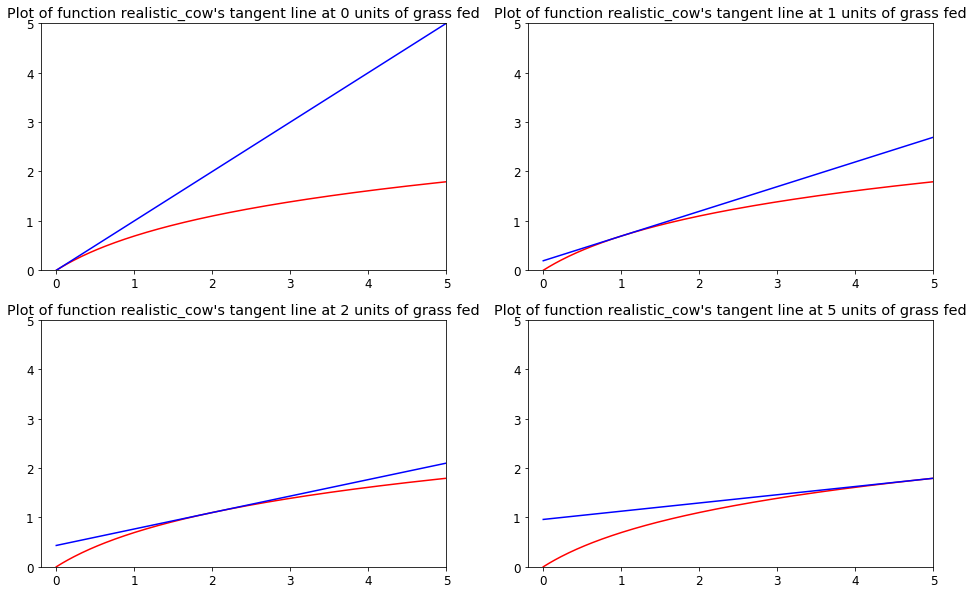

the tangent gets flatter and flatter


In [38]:
fig, ax = plt.subplots(2,2, figsize=(16,10))

for i, grass_quantity in enumerate([0, 1, 2, 5]):
    my_ax = ax.ravel()[i]
    tangent_line(realistic_cow, grass_quantity, 0, 5, my_ax)
    my_ax.set_title('Plot of function ' +
                    realistic_cow.__name__ +
                    '\'s tangent line at ' +
                    str(grass_quantity) + 
                   ' units of grass fed') 
plt.show()
print("the tangent gets flatter and flatter")

Remember that earlier, with our function cow, no matter what number we put in the derivative equation, we always got "2" back ? 
Here is the visual intuition: since the function is linear (y = 2x), the tangent line to this function sticks to the function itself ! In the next graphs, the blue and red lines are stacked against one another:

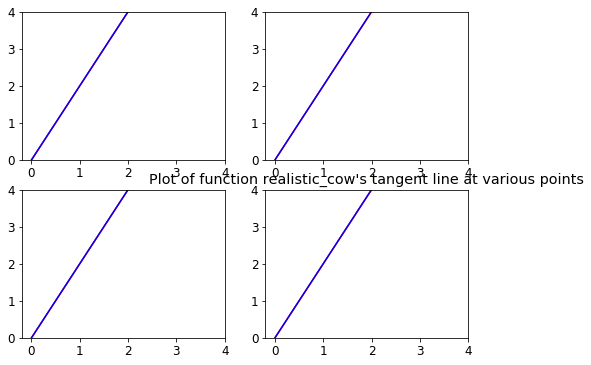

In [39]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
plt.title('Plot of function ' + realistic_cow.__name__ + '\'s tangent line at various points')  

for i, grass_quantity in enumerate([0, 1, 2, 5]):
    my_ax = ax.ravel()[i]
    tangent_line(cow, grass_quantity, 0, 4, my_ax)
plt.show()

And what's the "slope" of this straight line ? Well, two. Each time I move 1 along the x axis, I move two along the y axis. <br /> That was the definition of the function, by the way: <br /> 
milk = 2xgrass <=> y = 2x ;) 

That's why the derivative of our function was always 2. 

And that's why the derivative of any function that multiplies its input a constant is always that constant. Derivative of y = 257 * x ? 257 of course!

### A cow that doesn't care

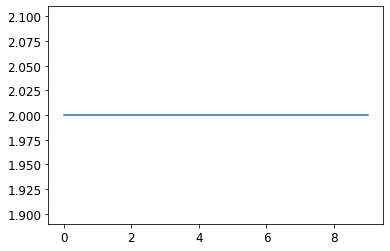

In [40]:
# This cow will give you 2L of milk no matter what
def stoic_cow(x):
    return 2

plt.plot([stoic_cow(x) for x in range(10)])

As we've seen above, the tangent of a straight line is this straight line itself. The straight line we have here is totally horizontal. What is the "slope" of a totally horizontal line ? Well, 0. 

Hence, if you knew that the derivative of a constant was 0 but didn't really understand why, now you know: <b> no Matter how much grass we _input_ into that cow, the output (milk) quantity will change by absolutely nothing </b>

## Back to gradients

I hope you are now comfortable thinking of your functions as boxes which transform an input into an output.

<img src="illustrations/Screenshot_2020-10-04 Functions - A Review of Functions Coursera.png" />
(This illustration was taken from the wonderful Calculus course by Upenn professor Ghrist on Coursera: https://www.coursera.org/learn/single-variable-calculus) 

And I hope you understand the derivative is something that answers for you the question: <i>"if I changed the input by a little bit, how would my output change ?"</i>

Of course, you've been telling yourself all along "Well, those exemples are dumb ! Cows don't only eat grass, they also drink water. They would not be able to produce milk without water !"

You are right. Our cow is a multivariable function : The ouput of our cow function doesn't depend only on one input, but on two.

"Well, how will we calculate the change in output given a change in input when there are two inputs ?", I hear you say.

That's the purpose of Multivariable Calculus. I cannot teach you all this in a single notebook. But here a few things that I believe are enough for you to understand gradient descent and the backpropagation:

<ul>
    <li> A gradient is composed of partial derivatives </li>
    <li> To calculate a partial derivative, treat the other input variables as constants </li>
    <li> This now tells you: <b> "<i>all other things being equal </i>, if I tweaked this input variable by a little bit, how would my output change ?" </b> </li>
    <li> All those partial derivatives together give you <b>the direction and rate of fastest increase</b> along a multivariable function  </li>
</ul>

### You can now understand the equations I gave in the previous notebook ! 

\begin{array}{c}
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}} 
\end{array}




MSE is our function. It takes and input (your predictions, y_hat), and gives back an output (your loss).

The question you are asking is: how much would my loss change if I changed my predictions by a little bit ?

But your predictions, themselves, are a function of your input(x), and your parameters(a and b) :

\begin{array}{c}
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-(a x_{i} + b ) \right)^{2}} \\
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-a x_{i} - b\right)^{2}}
\end{array}

What's particular about machine learning is you can't change your input: the input might be the number of square meters of an apartment, and you want to predict its price. But you can change your parameters ! 

By changing the parameters, you change your y_hat (your predictions). And by changing your predictions, you change what you put into the MSE function. If you change what you put inside that function, the output (your error) will change.

By how much ? Well, let's calculate the gradients. First, what is the gradient for "a" ?

\begin{aligned}
\frac{\partial M S E}{\partial a} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial a}
\end{aligned}

The equation above says: <blockquote> the change in MSE if I changed "a" by a tiny bit <b>is equal to:</b>
    - the change in MSE I would get from changing y_hat...
    - multiplied by the change in y_hat I would get from changing "a" 
</blockquote>

Let's work on this bit by bit

<b> a) </b> the change in MSE I would get from changing y_hat... <br />
If I changed y_hat by a tiny bit, how would (y - y_hat)² change ? 
- Take a derivative of an outside function: ()² becomes 2()
- Keep an inside function as-is: y-(ax+b)


<b> b) </b> the change in y_hat (my predictions) I would get from changing "a"... <br />
- Take a partial derivative with respect to aa": 0-(x+0) or -x.

Lets elaborate on how we get this result: we treat anything that is not "a" as a constant. Gradients or derivatives of Constants are always equal to 0. The derivative of ax is x, because the derivative of "a" is 1, and any number or a variable attached to "a" stays in place, meaning 1*x, or just x.

Hence you can now understand where does the -2 and the xi come from in the following equation: 

\begin{aligned}
\frac{\partial M S E}{\partial a} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial a}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a x_{i} - b\right) \cdot\left(-x_{i}\right)=-2 \frac{1}{N} \sum_{i=1}^{N} x_{i}\left(y_{i}-\hat{y}_{i}\right) *
\end{aligned}
\*the mean of [ (errors)(xi) ]

I'll leave it to you to re-derive the intermediate steps of the gradient of the MSE with respect to the parameter b

# The "descent" in gradient descent

The gradient we calculated can be interpreted as the "direction and rate of fastest increase". We don't want our MSE to increase, but on the contrary we want it to decrease. So we update our parameters by <b>subtracting</b> this gradient !

You can know understand fully the two lines of code in our previous notebook: 

In [42]:
# The code equivalent to our above equation:
# a_grad = -2 * (x * errors).mean()

# We update the parameters by subtracting the gradient :
# a -= a_grad * learning_rate